In [46]:
enrol_monthly_export.to_json(
    "../outputs/enrolment_age_trend.json",
    orient="records"
)

In [45]:
enrol_monthly_export = enrol_monthly.reset_index()
enrol_monthly_export['month'] = enrol_monthly_export['month'].astype(str)

In [44]:
test = pd.read_json("../outputs/monthly_tx.json")
test.head()

,state,month,total_tx,zscore,anomaly
0,100000,2025-09,800012,0.780605,False
1,100000,2025-10,100001,-1.405495,False
2,100000,2025-11,400011,-0.468579,False
3,100000,2025-12,900194,1.093469,False
4,Andaman & Nicobar Islands,2025-09,29020817,1.687006,False


In [42]:
monthly_tx_export.to_json(
    "../outputs/monthly_tx.json",
    orient="records"
)

In [40]:
monthly_tx_export.to_json(
    "../outputs/monthly_tx.json",
    orient="records"
)

In [39]:
monthly_tx_export = monthly_tx.copy()

monthly_tx_export['month'] = monthly_tx_export['month'].astype(str)

In [37]:
aspi.to_csv("../outputs/aspi_statewise.csv")
monthly_tx.to_csv("../outputs/monthly_transactions_with_anomalies.csv", index=False)


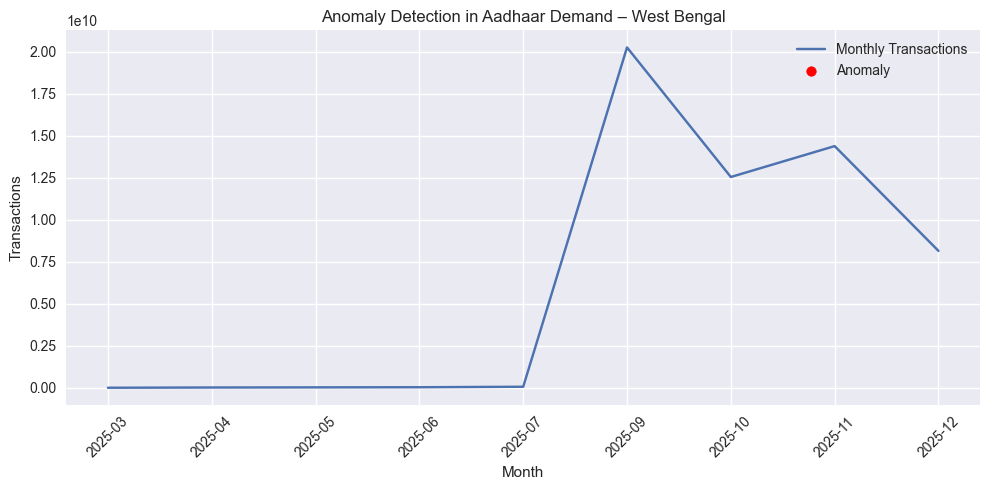

In [36]:
plt.figure(figsize=(10,5))
plt.plot(df_state['month'].astype(str), df_state['total_tx'], label='Monthly Transactions')

anoms = df_state[df_state['anomaly']]
plt.scatter(anoms['month'].astype(str), anoms['total_tx'], color='red', label='Anomaly')

plt.xticks(rotation=45)
plt.title(f"Anomaly Detection in Aadhaar Demand – {state_name}")
plt.xlabel("Month")
plt.ylabel("Transactions")
plt.legend()
plt.tight_layout()
plt.savefig("../outputs/anomaly_example_state.png")
plt.show()

In [35]:
state_name = aspi.head(1).index[0] 
df_state = monthly_tx[monthly_tx['state'] == state_name]


In [34]:
monthly_tx[monthly_tx['anomaly']].head(10)

,state,month,total_tx,zscore,anomaly


In [33]:
ANOM_THRESHOLD = 2.5 

monthly_tx['anomaly'] = monthly_tx['zscore'].abs() >= ANOM_THRESHOLD

In [31]:
monthly_tx['zscore'] = (
    monthly_tx.groupby('state')['total_tx']
              .transform(lambda x: (x - x.mean()) / x.std(ddof=0))
)

In [30]:
monthly_tx = (
    enrol.groupby(['state','month'])
         .sum(numeric_only=True)
         .sum(axis=1)
         .reset_index(name='total_tx')
)

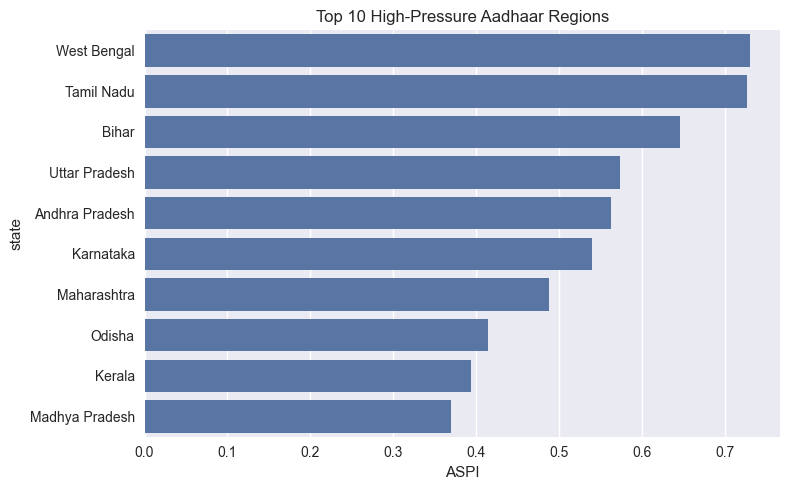

In [29]:
top10 = aspi.head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top10['ASPI'], y=top10.index)
plt.title("Top 10 High-Pressure Aadhaar Regions")
plt.tight_layout()
plt.savefig("../outputs/aspi_top10.png")
plt.show()

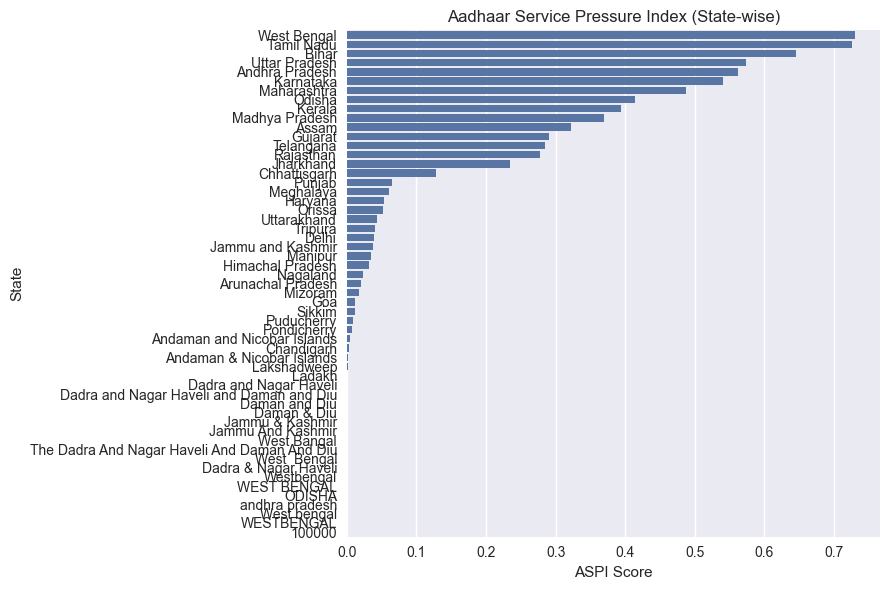

In [28]:
plt.figure(figsize=(9,6))
sns.barplot(x=aspi['ASPI'], y=aspi.index)
plt.title("Aadhaar Service Pressure Index (State-wise)")
plt.xlabel("ASPI Score")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("../outputs/aspi_statewise.png")
plt.show()

In [27]:
aspi = aspi.sort_values('ASPI', ascending=False)
aspi.head(10)

,enrolment_load,demographic_update_load,biometric_update_load,volatility,ASPI
state,,,,,
West Bengal,0.368433,0.995787,0.823261,0.961516,0.729655
Tamil Nadu,0.216750,1.000000,1.000000,1.000000,0.725863
Bihar,0.598436,0.662958,0.603972,0.859789,0.645312
Uttar Pradesh,1.000000,0.325393,0.321580,0.457955,0.573809
Andhra Pradesh,0.125345,0.881885,0.778005,0.595498,0.562487
Karnataka,0.219152,0.724802,0.708952,0.685470,0.539929
Maharashtra,0.362387,0.556196,0.552568,0.553908,0.487227
Odisha,0.116663,0.571220,0.571492,0.590510,0.414122
Kerala,0.073629,0.588272,0.585527,0.453595,0.393993


In [26]:
aspi['ASPI'] = (
    0.35 * aspi['enrolment_load'] +
    0.30 * aspi['demographic_update_load'] +
    0.25 * aspi['biometric_update_load'] +
    0.10 * aspi['volatility']
)

In [25]:
def minmax(col):
    return (col - col.min()) / (col.max() - col.min())

for c in aspi.columns:
    aspi[c] = minmax(aspi[c])

In [24]:
monthly_total = (
    enrol.groupby(['state','month']).sum(numeric_only=True).sum(axis=1)
)

volatility = monthly_total.groupby('state').std()
aspi['volatility'] = volatility
aspi = aspi.fillna(0)

In [23]:
aspi = aspi.fillna(0)

In [22]:
aspi = enrol_state[['enrolment_load']].copy()
aspi['demographic_update_load'] = demo_state['demographic_update_load']
aspi['biometric_update_load'] = bio_state['biometric_update_load']


In [21]:
bio_state.sort_values('biometric_update_load', ascending=False).head()


,pincode,bio_age_5_17,bio_age_17_,biometric_update_load
state,,,,
Tamil Nadu,114880695271,2227252,2470865,114885393388
West Bengal,94578100665,1040470,1483978,94580625113
Andhra Pradesh,89377692620,2241448,1473144,89381407212
Karnataka,81445544631,1244999,1390955,81448180585
Bihar,69382635260,2208141,2689446,69387532847


In [20]:
bio_state = bio.groupby('state').sum(numeric_only=True)
bio_state['biometric_update_load'] = bio_state.sum(axis=1)


In [19]:
bio.columns


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'month'],
      dtype='object')

In [18]:
demo_state = demo.groupby('state').sum(numeric_only=True)
demo_state['demographic_update_load'] = demo_state.sum(axis=1)


In [17]:
demo.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'month'],
      dtype='object')

In [16]:
enrol_state.sort_values('enrolment_load', ascending=False).head()


,age_0_5,age_5_17,age_18_greater,enrolment_load
state,,,,
Uttar Pradesh,521045,479682,17902,1018629
Bihar,262875,334802,11908,609585
Madhya Pradesh,367990,116381,9599,493970
West Bengal,275391,91396,8510,375297
Maharashtra,278814,82116,8209,369139


In [15]:
enrol_state['enrolment_load'] = enrol_state.sum(axis=1)


In [14]:
enrol_state = enrol.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()


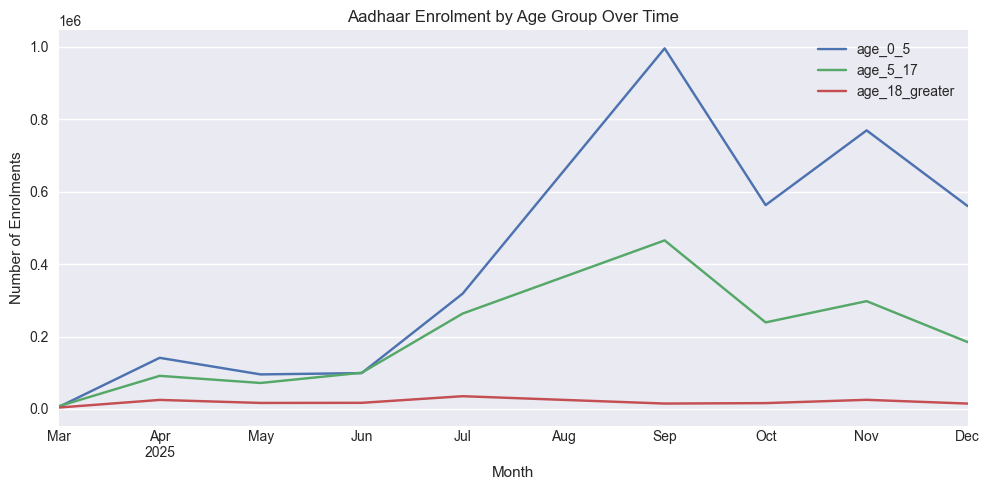

In [13]:
plt.figure(figsize=(10,5))
enrol_monthly.plot(ax=plt.gca())
plt.title("Aadhaar Enrolment by Age Group Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Enrolments")
plt.tight_layout()
plt.savefig("../outputs/enrolment_age_trend.png")
plt.show()

In [12]:
enrol_monthly = enrol.groupby('month')[['age_0_5','age_5_17','age_18_greater']].sum()

In [11]:
for df in [enrol, demo, bio]:
    df['month'] = df['date'].dt.to_period("M")

In [9]:
enrol['date'] = pd.to_datetime(enrol['date'], dayfirst=True, format='mixed')
demo['date']  = pd.to_datetime(demo['date'], dayfirst=True, format='mixed')
bio['date']   = pd.to_datetime(bio['date'], dayfirst=True, format='mixed')

In [7]:
enrol.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [6]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

enrol = clean_columns(enrol)
demo  = clean_columns(demo)
bio   = clean_columns(bio)

In [5]:
enrol.head()
demo.head()
bio.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [4]:
print(enrol.shape)
print(demo.shape)
print(bio.shape)

(1006029, 7)
(2071700, 6)
(1861108, 6)


In [3]:
enrol = load_and_merge("../data/api_data_aadhar_enrolment")
demo  = load_and_merge("../data/api_data_aadhar_demographic")
bio   = load_and_merge("../data/api_data_aadhar_biometric")

Loading 3 files from ../data/api_data_aadhar_enrolment
Loading 5 files from ../data/api_data_aadhar_demographic
Loading 4 files from ../data/api_data_aadhar_biometric


In [2]:
def load_and_merge(folder_path):
    files = glob.glob(folder_path + "/*.csv")
    print(f"Loading {len(files)} files from {folder_path}")
    df_list = [pd.read_csv(f) for f in files]
    return pd.concat(df_list, ignore_index=True)


In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")